In [41]:
from sklearn.datasets import load_boston
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
boston_dataset=load_boston()
%matplotlib inline

In [2]:
type(boston_dataset)

sklearn.utils.Bunch

In [3]:
dir(boston_dataset)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [4]:
print(boston_dataset.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [5]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
data = pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)

data['PRICE']=boston_dataset.target

In [8]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [9]:
data.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [10]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


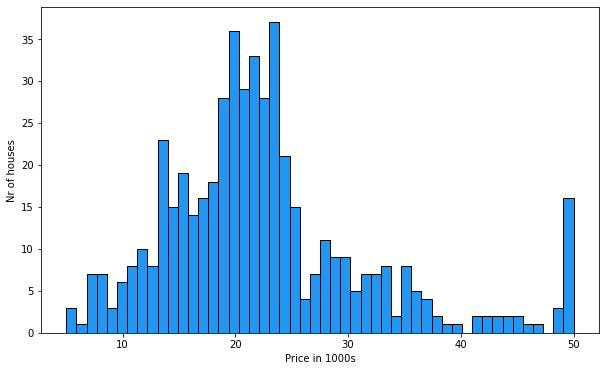

In [12]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'],bins=50,ec='black',color='#2196f3')
plt.ylabel('Nr of houses')
plt.xlabel('Price in 1000s')
plt.show()

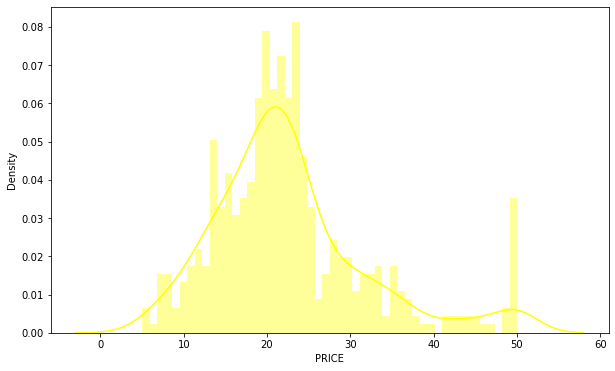

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'],bins=50,color='Yellow')
plt.show()

In [14]:
print(data['RM'].mean())
sum(data['RM'])/len(data['RM'])

6.284634387351787


6.284634387351787

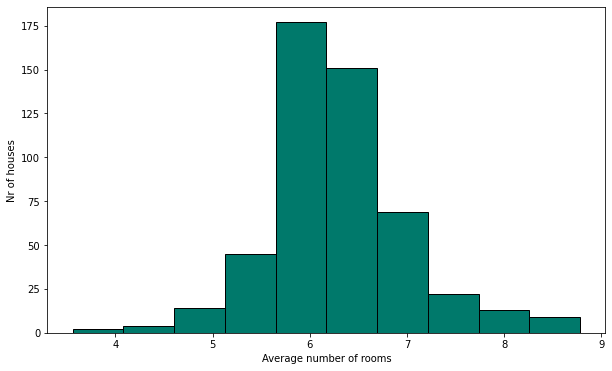

In [15]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'],ec='black',color='#00796b')
plt.ylabel('Nr of houses')
plt.xlabel('Average number of rooms')
plt.show()

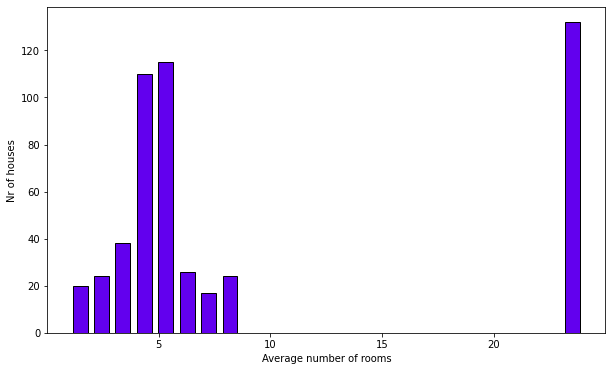

In [16]:
plt.figure(figsize=(10,6))
plt.hist(data['RAD'],ec='black',bins=24,color='#6200ee',rwidth=0.7)
plt.ylabel('Nr of houses')
plt.xlabel('Average number of rooms')
plt.show()

In [17]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

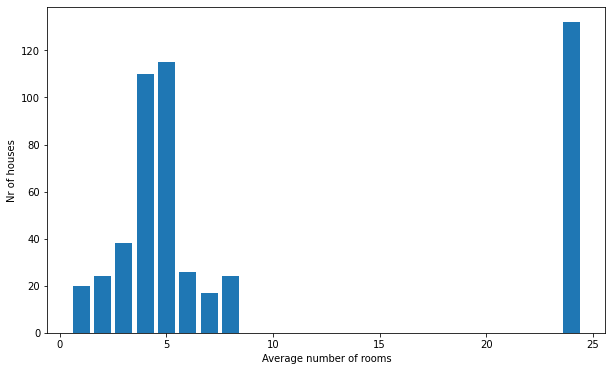

In [18]:
frequency=data['RAD'].value_counts()
# frequency.index
# frequency.axes[0]

plt.figure(figsize=(10,6))
plt.ylabel('Nr of houses')
plt.xlabel('Average number of rooms')
plt.bar(frequency.index,height=frequency)
plt.show()

In [19]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [20]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [21]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375616

In [22]:
mask =np.zeros_like(data.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices] = True


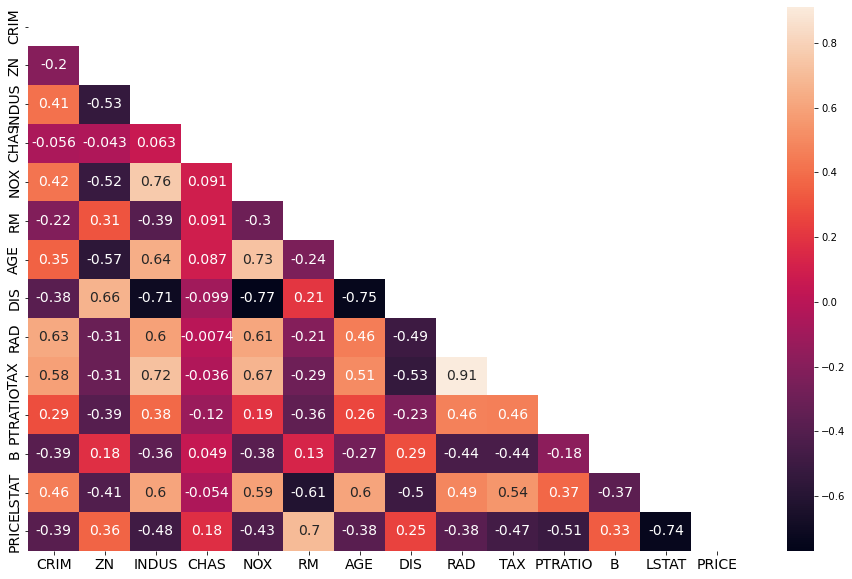

In [23]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws={"size":14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

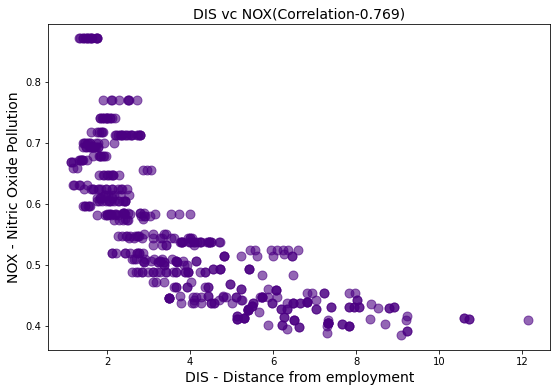

In [24]:
nox_dis_corr=round(data['NOX'].corr(data['DIS']),3)
plt.figure(figsize=(9,6))
plt.scatter(x=data['DIS'],y=data['NOX'],alpha=0.6,s=80,color='indigo')
plt.title(f'DIS vc NOX(Correlation{nox_dis_corr})',fontsize=14)
plt.xlabel('DIS - Distance from employment',fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution',fontsize=14)
plt.show()

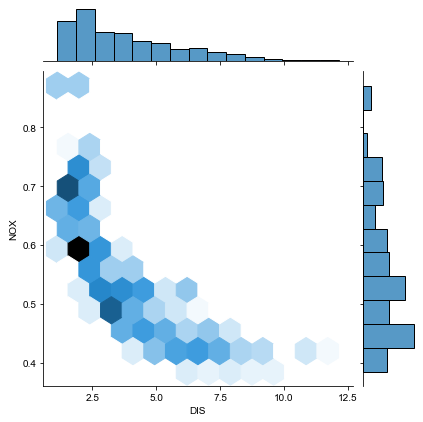

In [25]:
sns.jointplot(x=data['DIS'],y=data['NOX'],kind='hex')
sns.set_context('talk')
sns.set_style('whitegrid')


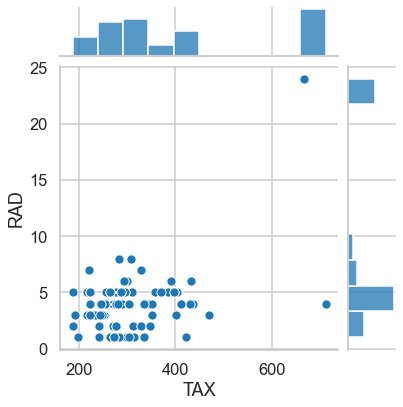

In [26]:
sns.jointplot(x=data['TAX'],y=data['RAD'])
sns.set_context('talk')
sns.set_style('whitegrid')


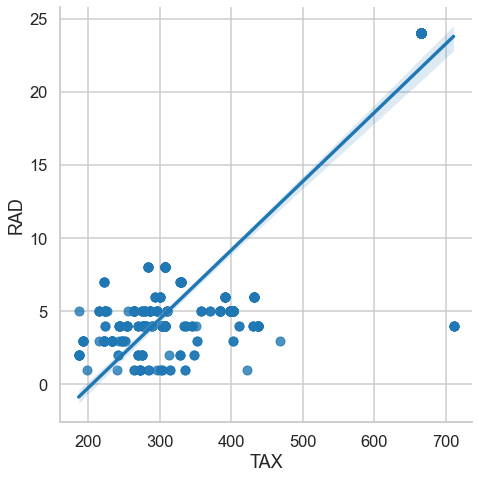

In [27]:
sns.lmplot(x='TAX',y='RAD',data=data,size=7)
plt.show()

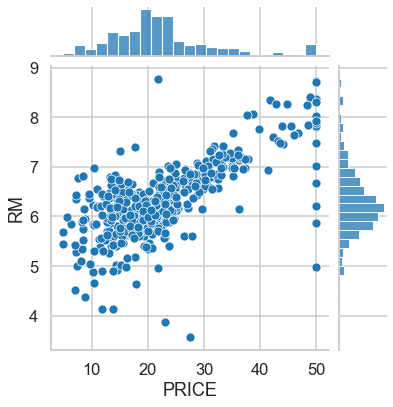

In [28]:
sns.jointplot(x=data['PRICE'],y=data['RM'])
sns.set_context('talk')
sns.set_style('whitegrid')


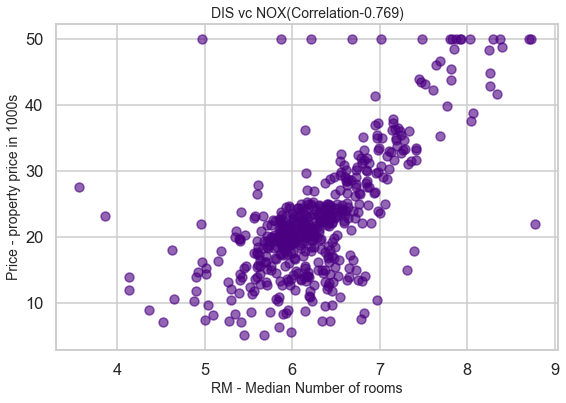

In [29]:
rm_tgt_corr=round(data['NOX'].corr(data['DIS']),3)
plt.figure(figsize=(9,6))
plt.scatter(x=data['RM'],y=data['PRICE'],alpha=0.6,s=80,color='indigo')
plt.title(f'DIS vc NOX(Correlation{nox_dis_corr})',fontsize=14)
plt.xlabel('RM - Median Number of rooms',fontsize=14)
plt.ylabel('Price - property price in 1000s',fontsize=14)
plt.show()

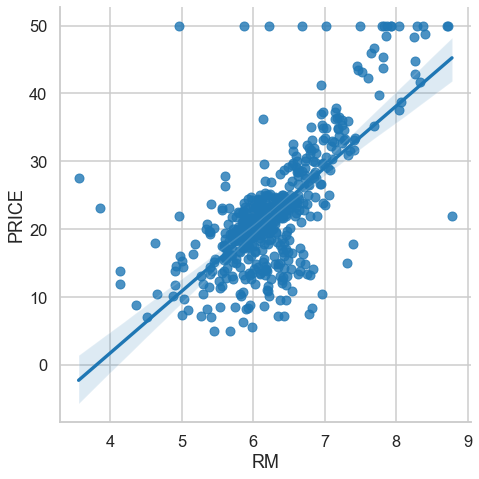

In [30]:
sns.lmplot(x='RM',y='PRICE',data=data,size=7)
plt.show()

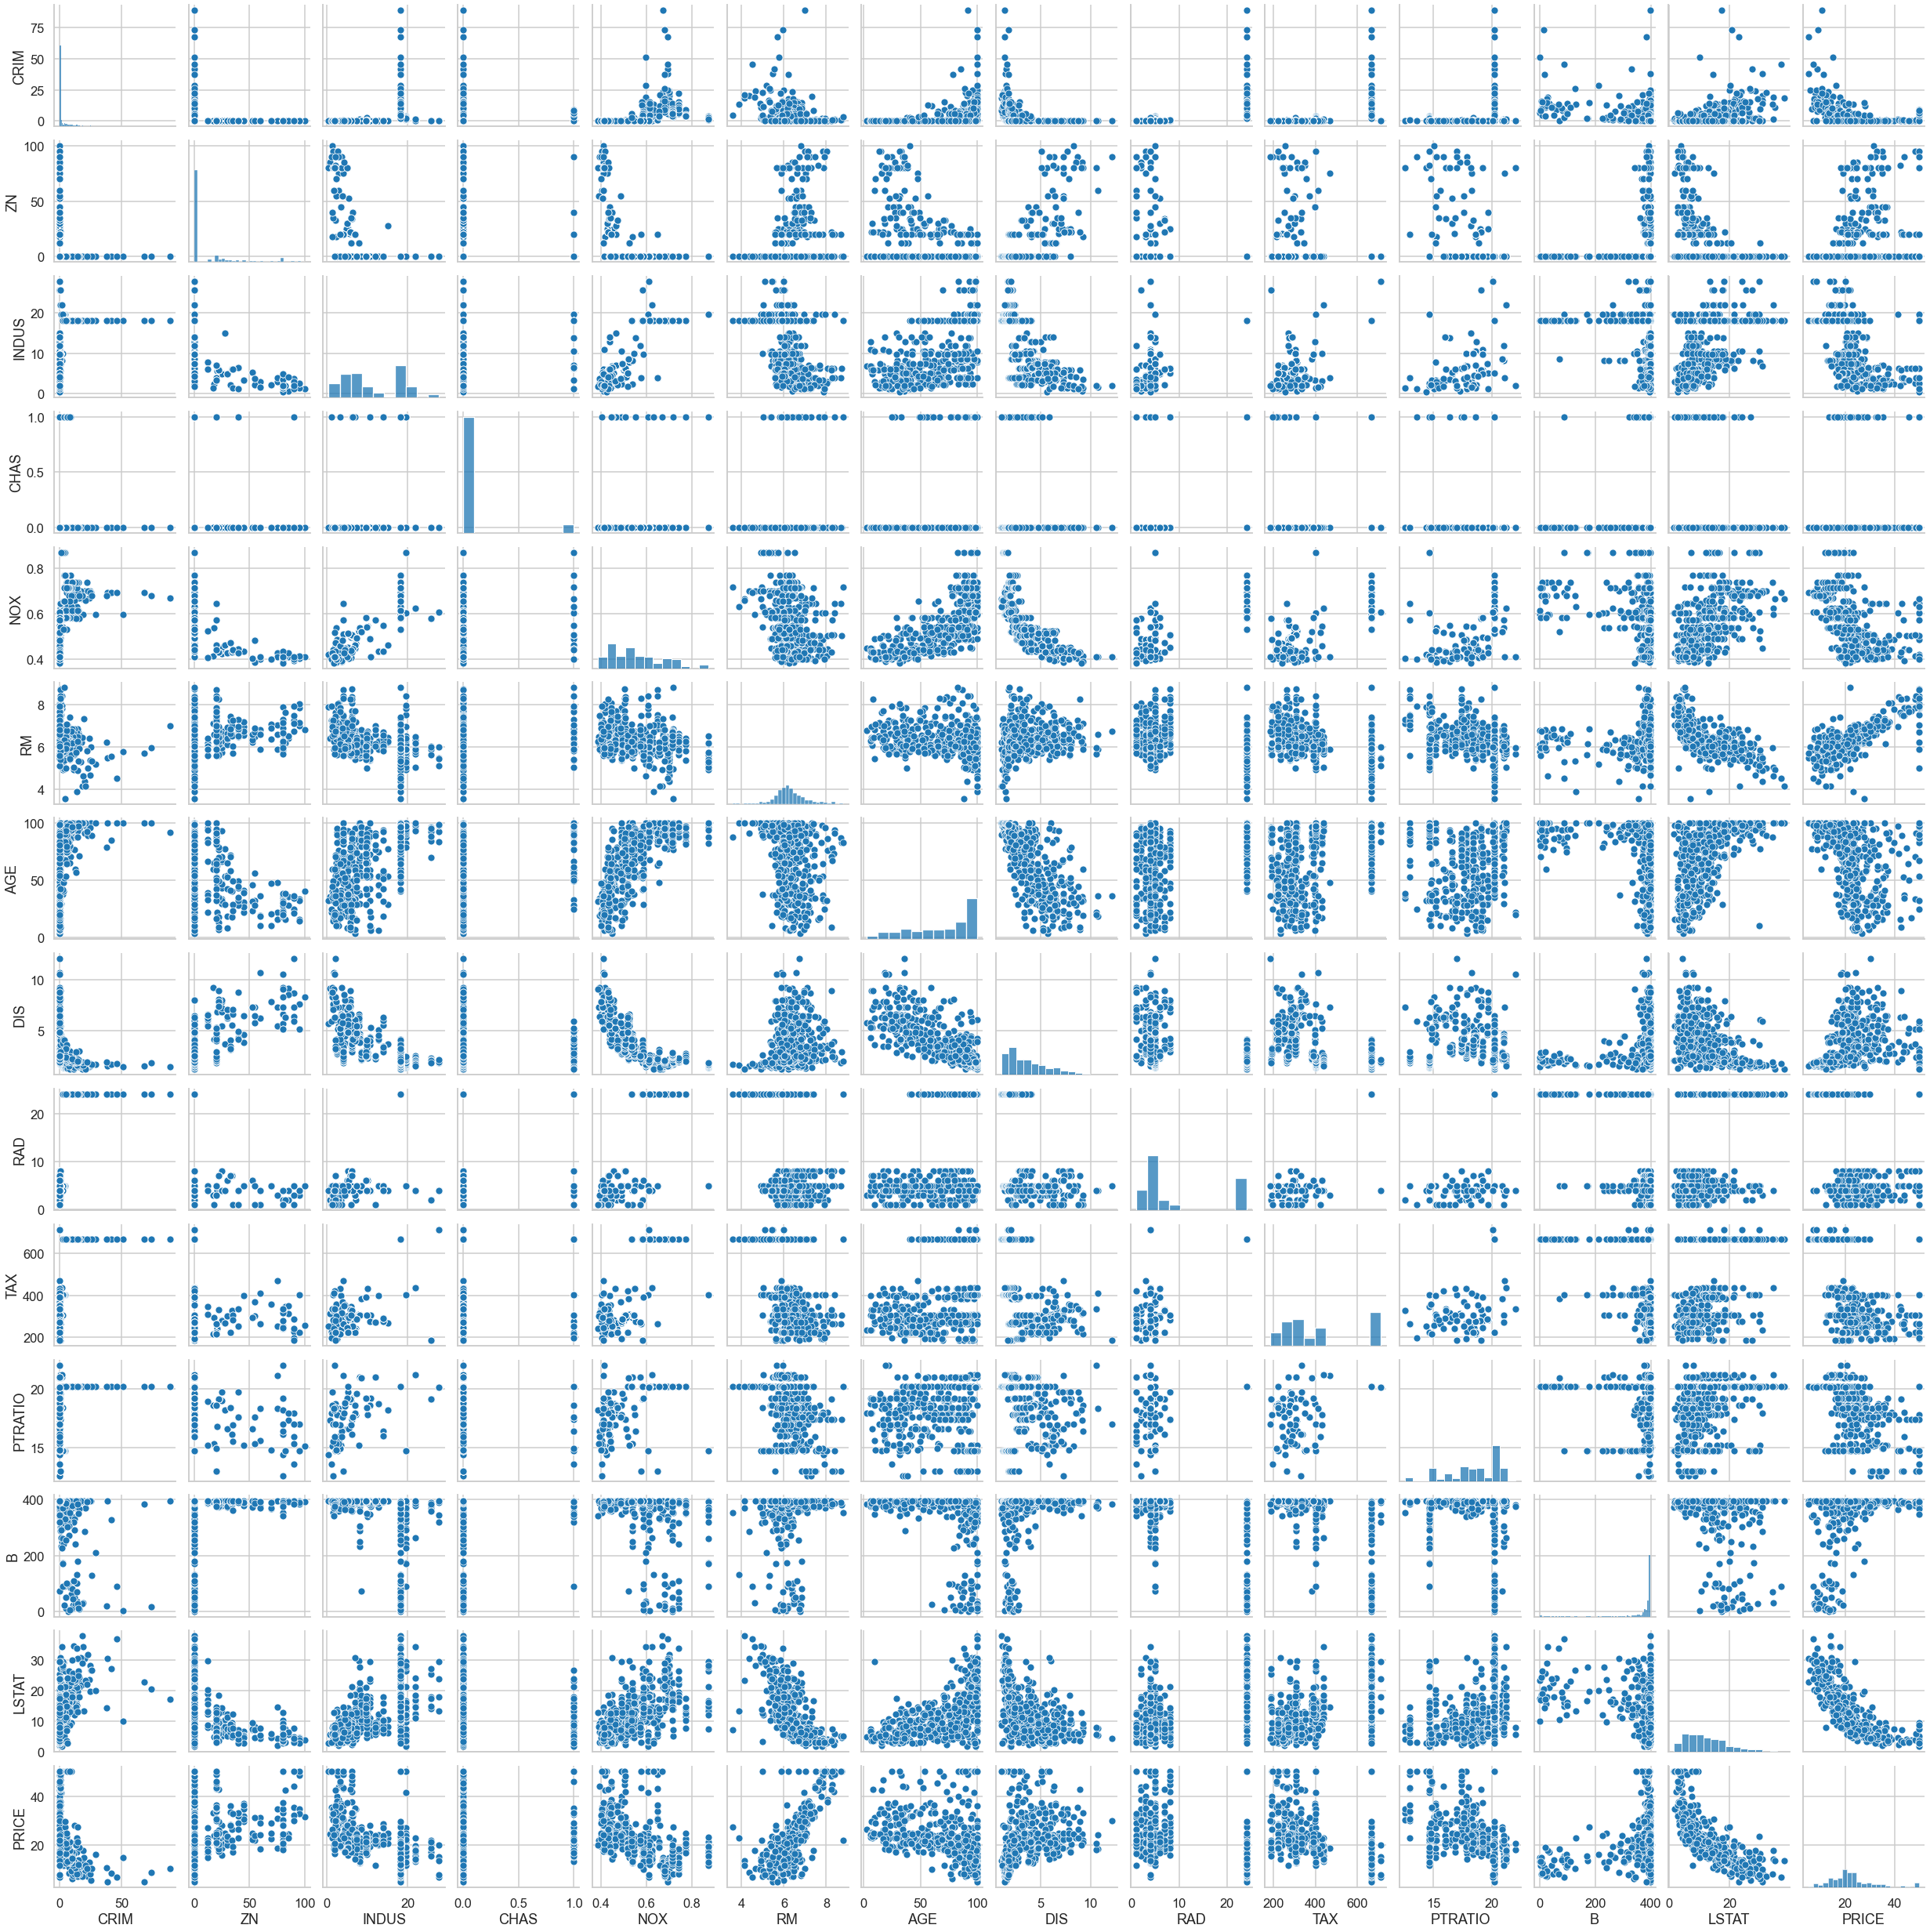

CPU times: total: 34.5 s
Wall time: 1min 19s


In [31]:
%%time

sns.pairplot(data)
plt.show()

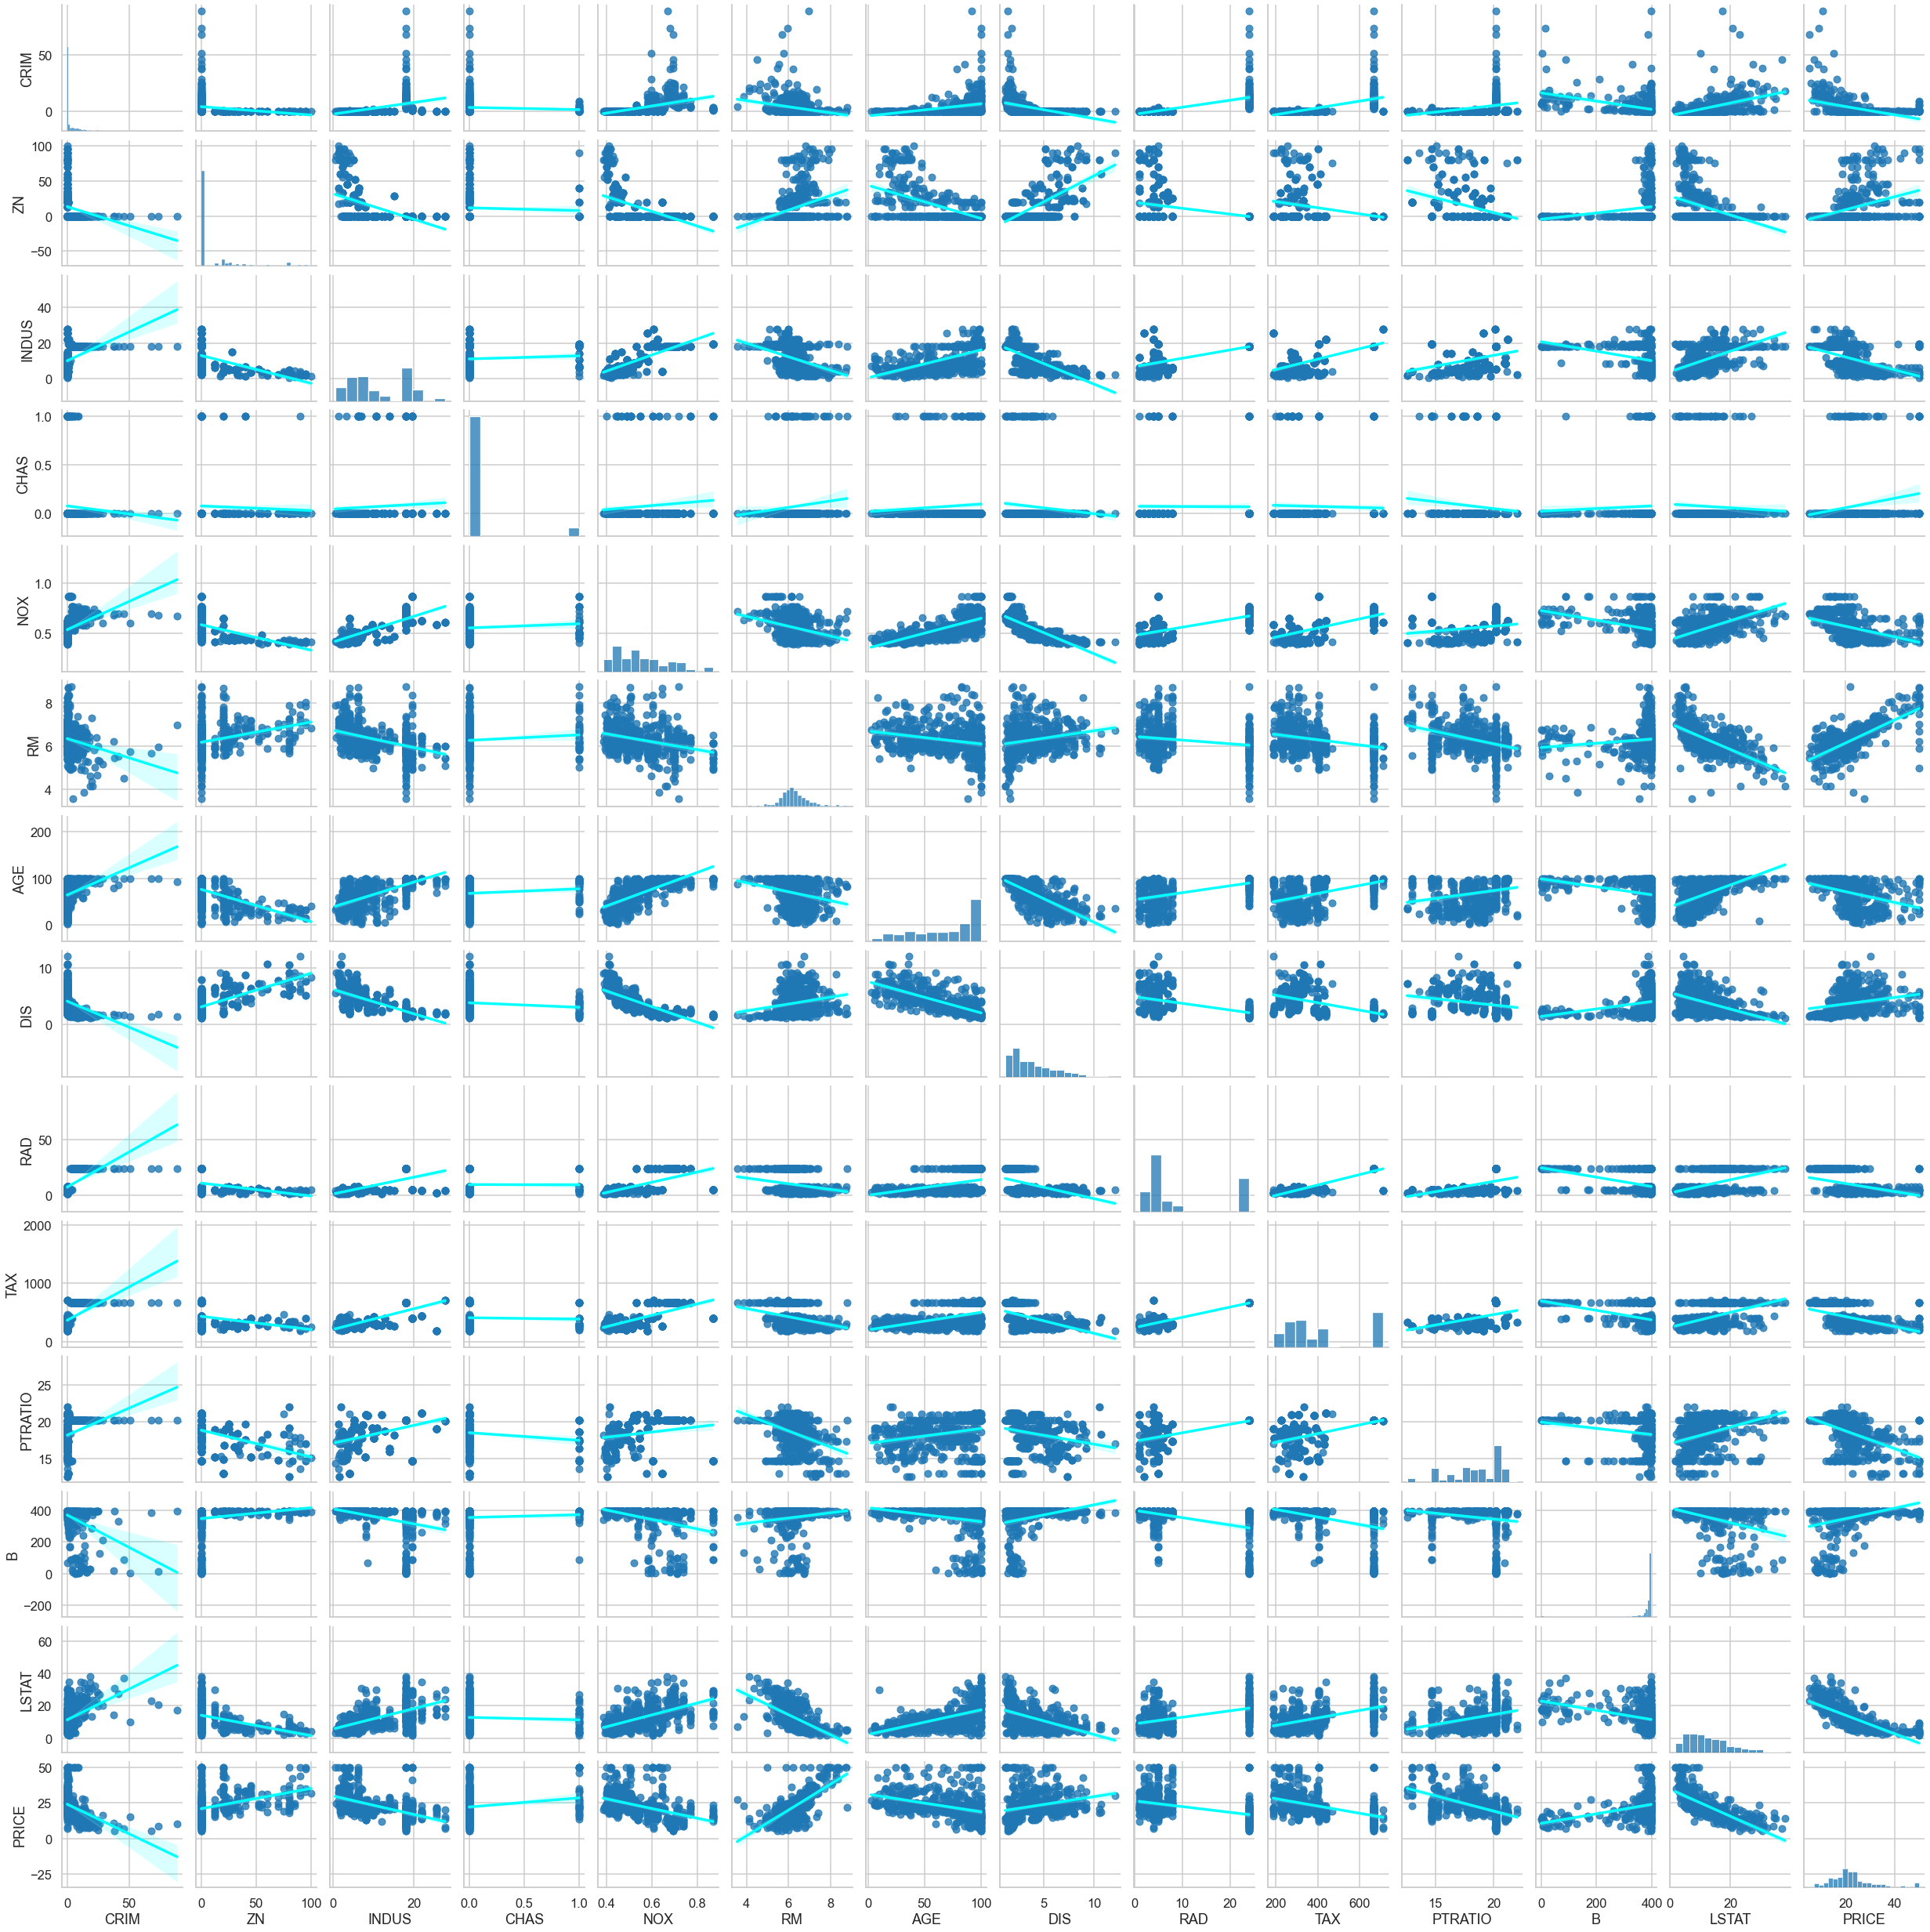

CPU times: total: 3min 27s
Wall time: 2min 20s


In [32]:
%%time

sns.pairplot(data, kind='reg',plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

## Training and Test DATASET Split

In [78]:
prices=np.log(data['PRICE'])
features=data.drop('PRICE',axis=1)
x_train,x_test,y_train,y_test = train_test_split(features,prices,
                                                 test_size=0.2,random_state=10)
# %of training set
len(x_train)/len(features)


0.7984189723320159

In [34]:
x_test.shape[0]/features.shape[0] #% of test data set

0.2015810276679842

# Multivariable regressions

In [35]:
regr = LinearRegression()
regr.fit(x_train,y_train)
print('Intercept',regr.intercept_)
pd.DataFrame(data=regr.coef_,index=x_train.columns,columns=['coefs'])

Intercept 36.53305138282446


coefs
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

In [36]:
print('Test data r-squared',regr.score(x_test,y_test))
print('Training data r-squared',regr.score(x_train,y_train))

Test data r-squared 0.6709339839115638
Training data r-squared 0.750121534530608


In [37]:
print(x_train.head())

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
50    0.08873  21.0   5.64   0.0  0.439  5.963   45.7  6.8147   4.0  243.0   
367  13.52220   0.0  18.10   0.0  0.631  3.863  100.0  1.5106  24.0  666.0   
34    1.61282   0.0   8.14   0.0  0.538  6.096   96.9  3.7598   4.0  307.0   
78    0.05646   0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0  398.0   
172   0.13914   0.0   4.05   0.0  0.510  5.572   88.5  2.5961   5.0  296.0   

     PTRATIO       B  LSTAT  
50      16.8  395.56  13.45  
367     20.2  131.42  13.33  
34      21.0  248.31  20.34  
78      18.7  386.40  12.34  
172     16.6  396.90  14.69  


In [38]:
print(x_test.head())

        CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
305  0.05479  33.0   2.18   0.0  0.472  6.616   58.1  3.3700  7.0  222.0   
193  0.02187  60.0   2.93   0.0  0.401  6.800    9.9  6.2196  1.0  265.0   
65   0.03584  80.0   3.37   0.0  0.398  6.290   17.8  6.6115  4.0  337.0   
349  0.02899  40.0   1.25   0.0  0.429  6.939   34.5  8.7921  1.0  335.0   
151  1.49632   0.0  19.58   0.0  0.871  5.404  100.0  1.5916  5.0  403.0   

     PTRATIO       B  LSTAT  
305     18.4  393.36   8.93  
193     15.6  393.37   5.03  
65      16.1  396.90   4.67  
349     19.7  389.85   5.89  
151     14.7  341.60  13.28  


# p values and evaluating coefficients

In [51]:
x_incl_const = sm.add_constant(x_train)

model=sm.OLS(y_train,x_incl_const)
results=model.fit()

# results.params
# results.pvalues
pd.DataFrame({'coef':results.params,'p-value':round(results.pvalues,3)})

coef  p-value
const    36.533051    0.000
CRIM     -0.128181    0.000
ZN        0.063198    0.000
INDUS    -0.007576    0.905
CHAS      1.974515    0.033
NOX     -16.271989    0.000
RM        3.108456    0.000
AGE       0.016292    0.262
DIS      -1.483014    0.000
RAD       0.303988    0.000
TAX      -0.012082    0.001
PTRATIO  -0.820306    0.000
B         0.011419    0.000
LSTAT    -0.581626    0.000

# Testing for multicollinearity

$$ TAX = \alpha_0 + \alpha_1 RM +....+\alpha_12 LSTAT $$
$$ VIF_{TAX} = \frac{1}{(1- R_{TAX}^2)} $$

In [55]:
variance_inflation_factor(exog=x_incl_const.values,exog_idx=1)

1.7145250443932485

In [59]:
#Columns in x_incl_const

len(x_incl_const.columns)
x_incl_const.shape[1]

14

In [61]:
#all vifs for all features

for i in range(x_incl_const.shape[1]):
    print(variance_inflation_factor(exog=x_incl_const.values,exog_idx=i))

597.5487126763895
1.7145250443932485
2.3328224265597597
3.943448822674638
1.0788133385000576
4.410320817897635
1.8404053075678564
3.3267660823099394
4.222923410477865
7.314299817005058
8.508856493040817
1.8399116326514058
1.3386713255364715
2.812544292793036


In [72]:

vif=[variance_inflation_factor(exog=x_incl_const.values,
                                     exog_idx=i) for i in range(x_incl_const.shape[1])]
print(vif)

pd.DataFrame({'coef_name':x_incl_const.columns,'vif':np.around(vif,3)})

[597.5487126763895, 1.7145250443932485, 2.3328224265597597, 3.943448822674638, 1.0788133385000576, 4.410320817897635, 1.8404053075678564, 3.3267660823099394, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.8399116326514058, 1.3386713255364715, 2.812544292793036]


coef_name      vif
0      const  597.549
1       CRIM    1.715
2         ZN    2.333
3      INDUS    3.943
4       CHAS    1.079
5        NOX    4.410
6         RM    1.840
7        AGE    3.327
8        DIS    4.223
9        RAD    7.314
10       TAX    8.509
11   PTRATIO    1.840
12         B    1.339
13     LSTAT    2.813

# Model Simplification and BIC

In [74]:
#original model with log prices and all features

x_incl_const = sm.add_constant(x_train)

model=sm.OLS(y_train,x_incl_const)
results=model.fit()


org_coef = pd.DataFrame({'coef':results.params,'p-value':round(results.pvalues,3)})
print("BIC is",results.bic)
print("r-squared is",results.rsquared)

BIC is 2424.9546968561976
r-squared is 0.750121534530608


In [75]:
#Reduced mdel 1 excluding indus

x_incl_const = sm.add_constant(x_train)
x_incl_const= x_incl_const.drop(['INDUS'],axis=1)

model=sm.OLS(y_train,x_incl_const)
results=model.fit()


org_coef = pd.DataFrame({'coef':results.params,'p-value':round(results.pvalues,3)})
print("BIC is",results.bic)
print("r-squared is",results.rsquared)

BIC is 2418.968071323753
r-squared is 0.7501123869895048


In [76]:
#Reduced mdel 1 excluding indus and age

x_incl_const = sm.add_constant(x_train)
x_incl_const= x_incl_const.drop(['AGE'],axis=1)

model=sm.OLS(y_train,x_incl_const)
results=model.fit()


org_coef = pd.DataFrame({'coef':results.params,'p-value':round(results.pvalues,3)})
print("BIC is",results.bic)
print("r-squared is",results.rsquared)

BIC is 2420.2578510217627
r-squared is 0.7493133399767096


# Residual and Residual plots


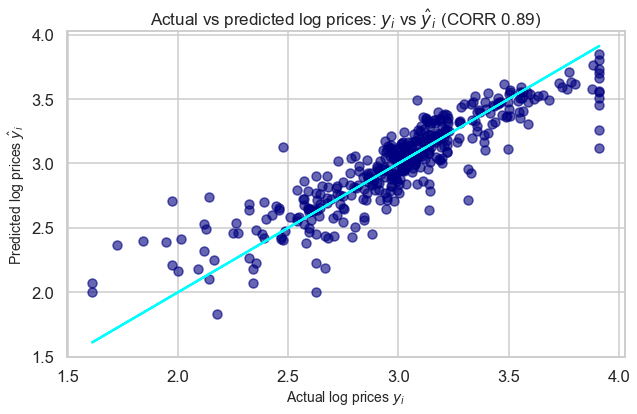

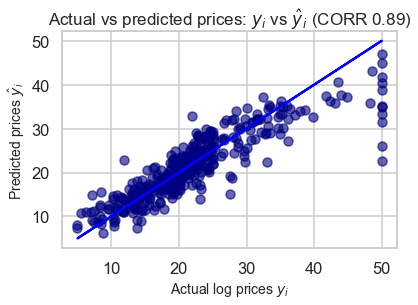

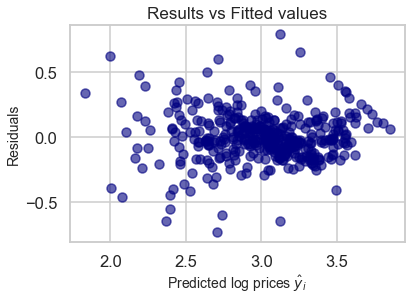

In [119]:
#Modified model: transformed(using log prices) and simplifies(dropping two features)
prices=np.log(data['PRICE'])
features=data.drop(['PRICE','INDUS','AGE'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(features,prices,
                                                 test_size=0.2,random_state=10)
# Using Statsmodel
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train,x_incl_const)
results=model.fit()

#residuals
# residuals = y_train-results.fittedvalues
# print(residuals.describe())

#Graph of actual vs predicted prices
plt.figure(figsize=(10,6))
corr = round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train,y=results.fittedvalues,c='navy',alpha=0.6)
plt.xlabel('Actual log prices $y_i$',fontsize=14)
plt.plot(y_train,y_train,color='cyan')
plt.ylabel('Predicted log prices $\hat y_i$',fontsize=14)
plt.title(f'Actual vs predicted log prices: $y_i$ vs $\hat y_i$ (CORR {corr})',fontsize=17)
plt.show()

plt.scatter(x=np.e**y_train,y=np.e**results.fittedvalues,c='navy',alpha=0.6)
plt.xlabel('Actual log prices $y_i$',fontsize=14)
plt.plot(np.e**y_train,np.e**y_train,color='blue')
plt.ylabel('Predicted prices $\hat y_i$',fontsize=14)
plt.title(f'Actual vs predicted prices: $y_i$ vs $\hat y_i$ (CORR {corr})',fontsize=17)
plt.show()
#residual vs predicted values
plt.scatter(x=results.fittedvalues,y=results.resid,c='navy',alpha=0.6)
plt.xlabel('Predicted log prices $\hat y_i$',fontsize=14)

plt.ylabel('Residuals',fontsize=14)
plt.title('Results vs Fitted values',fontsize=17)
plt.show()

reduced_log_mse = round(results.mse_resid,3)
reduced_log_mse = round(results.rsquared,3)



Text(0.5, 1.0, 'Log price model: residuals Skew(0.09 Mean(0.0))')

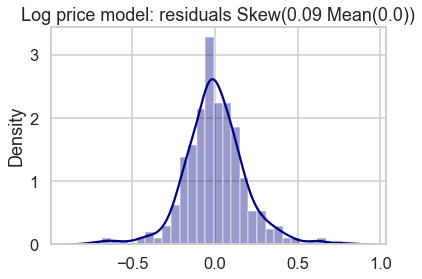

In [108]:
#distribution odf residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(),2)
resid_skew = round(results.resid.skew(),2)
sns.distplot(results.resid,color='navy')
plt.title(f"Log price model: residuals Skew({resid_skew} Mean({resid_mean}))")

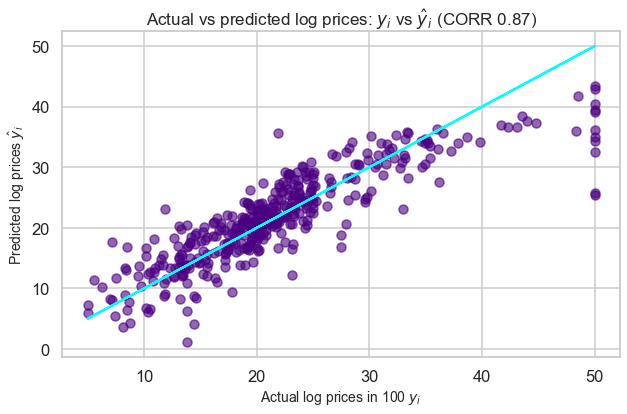

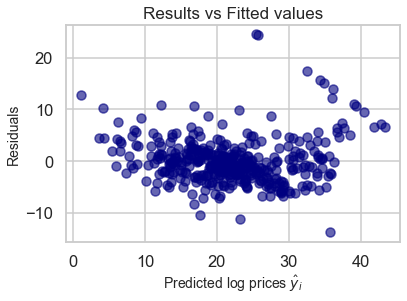

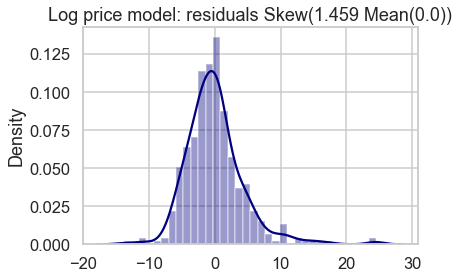

In [113]:
#nomral prices and all features
prices=data['PRICE']
features=data.drop(['PRICE'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(features,prices,
                                                 test_size=0.2,random_state=10)
# Using Statsmodel
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train,x_incl_const)
results=model.fit()


#Graph of actual vs predicted prices
plt.figure(figsize=(10,6))
corr = round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train,y=results.fittedvalues,c='indigo',alpha=0.6)
plt.xlabel('Actual log prices in 100 $y_i$',fontsize=14)
plt.plot(y_train,y_train,color='cyan')
plt.ylabel('Predicted log prices $\hat y_i$',fontsize=14)
plt.title(f'Actual vs predicted log prices: $y_i$ vs $\hat y_i$ (CORR {corr})',fontsize=17)
plt.show()


#residual vs predicted values
plt.scatter(x=results.fittedvalues,y=results.resid,c='navy',alpha=0.6)
plt.xlabel('Predicted log prices $\hat y_i$',fontsize=14)

plt.ylabel('Residuals',fontsize=14)
plt.title('Results vs Fitted values',fontsize=17)
plt.show()

#Residual Distribution chart
#distribution odf residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(),3)

sns.distplot(results.resid,color='navy')
plt.title(f"Log price model: residuals Skew({resid_skew} Mean({resid_mean}))")
plt.show()

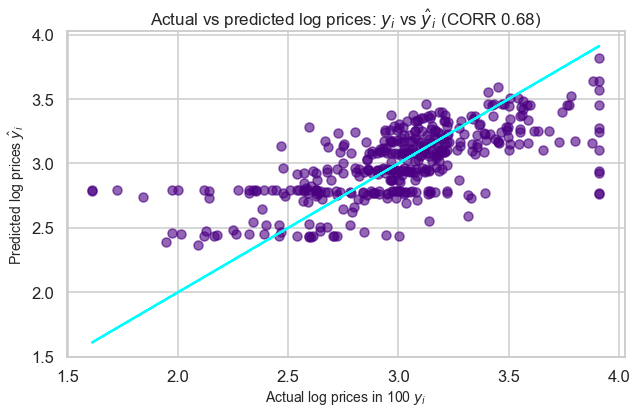

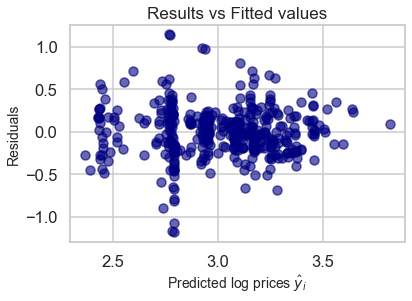

In [117]:
# Model Omitting key features using log prices
prices=np.log(data['PRICE'])
features=data.drop(['PRICE','INDUS','AGE','LSTAT','RM','NOX','CRIM'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(features,prices,
                                                 test_size=0.2,random_state=10)
# Using Statsmodel
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train,x_incl_const)
results=model.fit()


#Graph of actual vs predicted prices
plt.figure(figsize=(10,6))
corr = round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train,y=results.fittedvalues,c='indigo',alpha=0.6)
plt.xlabel('Actual log prices in 100 $y_i$',fontsize=14)
plt.plot(y_train,y_train,color='cyan')
plt.ylabel('Predicted log prices $\hat y_i$',fontsize=14)
plt.title(f'Actual vs predicted log prices: $y_i$ vs $\hat y_i$ (CORR {corr})',fontsize=17)
plt.show()


#residual vs predicted values
plt.scatter(x=results.fittedvalues,y=results.resid,c='navy',alpha=0.6)
plt.xlabel('Predicted log prices $\hat y_i$',fontsize=14)

plt.ylabel('Residuals',fontsize=14)
plt.title('Results vs Fitted values',fontsize=17)
plt.show()

#Residual Distribution chart
#distribution odf residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(),3)

sns.distplot(results.resid,color='navy')
plt.title(f"Log price model: residuals Skew({resid_skew} Mean({resid_mean}))")
plt.show()

omitted_var_mse = round(results.mse_resid,3)
omitted_var_mse = round(results.rsquared,3)

